# INTRODUCTION AND OVERVIEW

- Black Friday is one of the biggest retail events globally, generating a wealth of consumer data that reveals valuable insights into purchasing behavior. This dataset captures transaction-level information from a major retail store during the sales period, including customer demographics, product categories, and purchase amounts. With features like age, gender, city category, and product identifiers, it offers a rich opportunity for exploring patterns, segmenting customers, and applying machine learning techniques such as clustering, regression, and classification to forecast trends and optimize marketing strategies.

## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

## Data Loading

In [3]:
black_df = pd.read_csv('blackfridaysaleseda.csv')
black_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
black_df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


## Data Cleaning and Preprocessing

In [5]:
#Identifing the Missing Data
print('Train Data Info:')
black_df.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ 

In [6]:
print('Missing Values in Training Data:')
black_df.isnull().sum()

Missing Values in Training Data:


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
black_df[['Product_Category_2', 'Product_Category_3']].describe()

,Product_Category_2,Product_Category_3
count,376430.000000,166821.000000
mean,9.842329,12.668243
std,5.086590,4.125338
min,2.000000,3.000000
25%,5.000000,9.000000
50%,9.000000,14.000000
75%,15.000000,16.000000
max,18.000000,18.000000


In [8]:
black_df['Product_Category_2'].fillna(-999, inplace=True)
black_df['Product_Category_3'].fillna(-999, inplace=True)

C:\Users\Maheswaran\AppData\Local\Temp\ipykernel_25588\3626512912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  black_df['Product_Category_2'].fillna(-999, inplace=True)
C:\Users\Maheswaran\AppData\Local\Temp\ipykernel_25588\3626512912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [9]:
print('Missing Values after inputation:')
black_df.isnull().sum()

Missing Values after inputation:


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Expolratory Data Analysis(EDA)

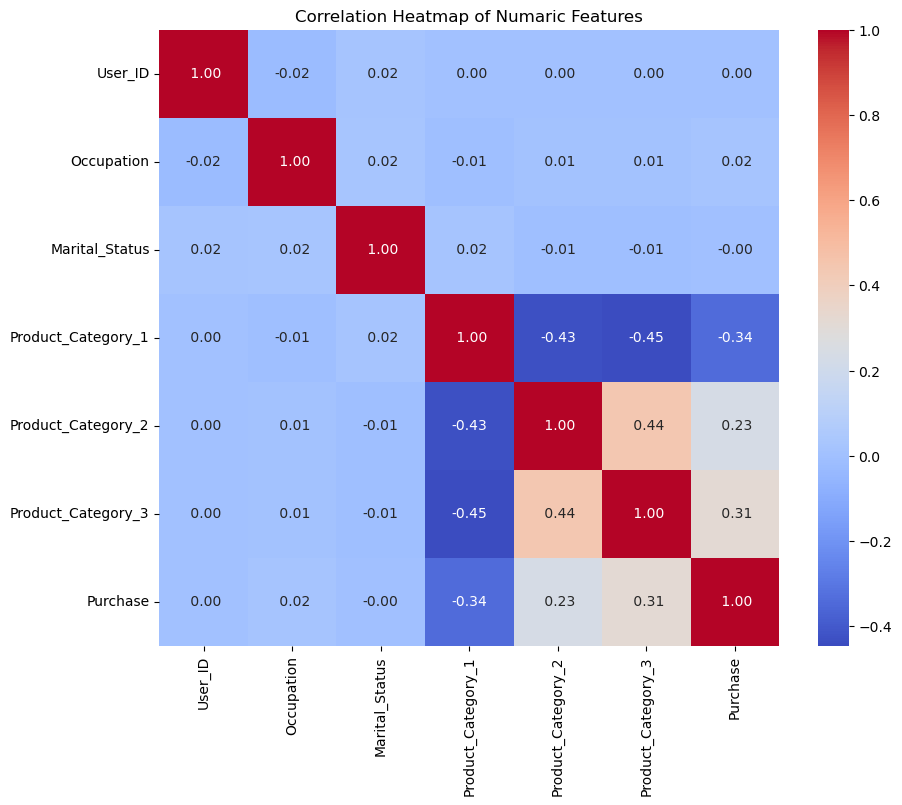

In [10]:
#Correction Heatmap
numaric_df = black_df.select_dtypes(include=[np.number])

if numaric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    correlation = numaric_df.corr()
    sns.heatmap(correlation, annot=True, fmt= ' .2f', cmap='coolwarm') 
    plt.title('Correlation Heatmap of Numaric Features')
    plt.show()

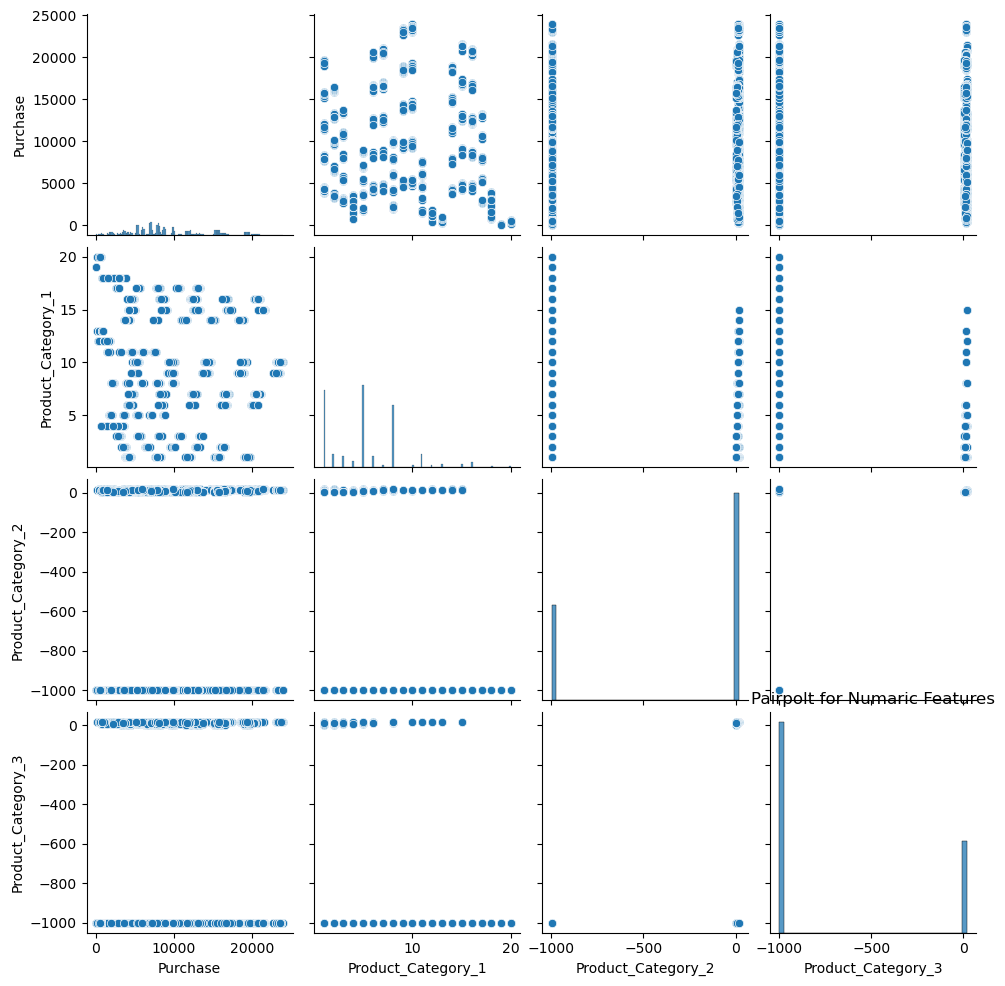

In [11]:
#Pairplot for Numaric Features
Selected_coloumns = ['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
sns.pairplot(black_df[Selected_coloumns])
plt.title('Pairpolt for Numaric Features')
plt.show()

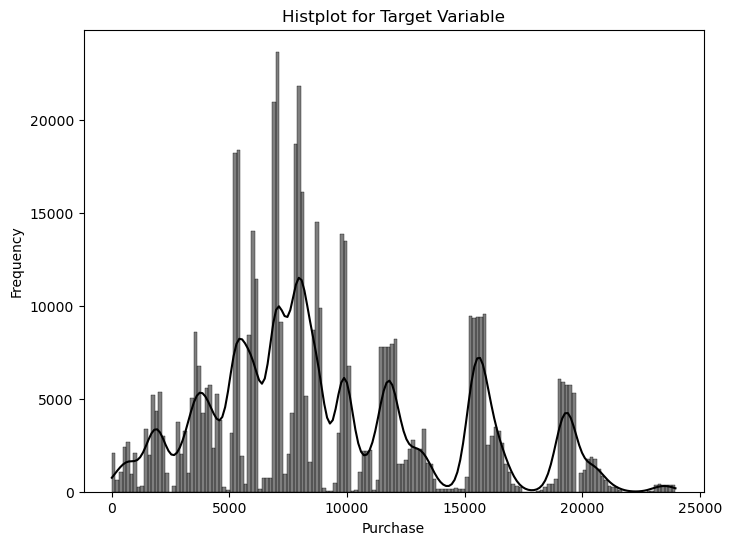

In [12]:
#Histogram plot for Target Variable 'Purchase'
plt.figure(figsize=(8, 6))
sns.histplot(black_df['Purchase'], kde=True, color='black')
plt.title('Histplot for Target Variable')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.show()

C:\Users\Maheswaran\AppData\Local\Temp\ipykernel_25588\2538489305.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=black_df, palette='pastel')


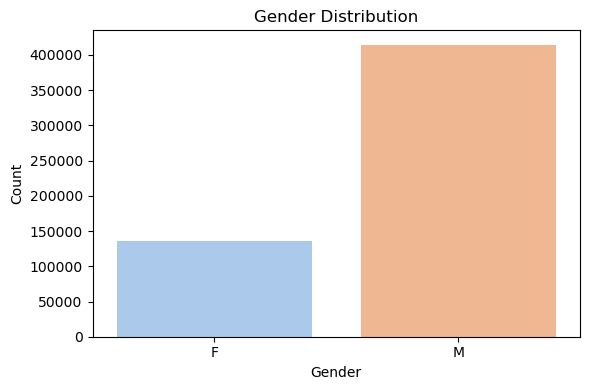

In [13]:
# Countplot for Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=black_df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\Maheswaran\AppData\Local\Temp\ipykernel_25588\877730989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Purchase', data=black_df, palette='pastel')


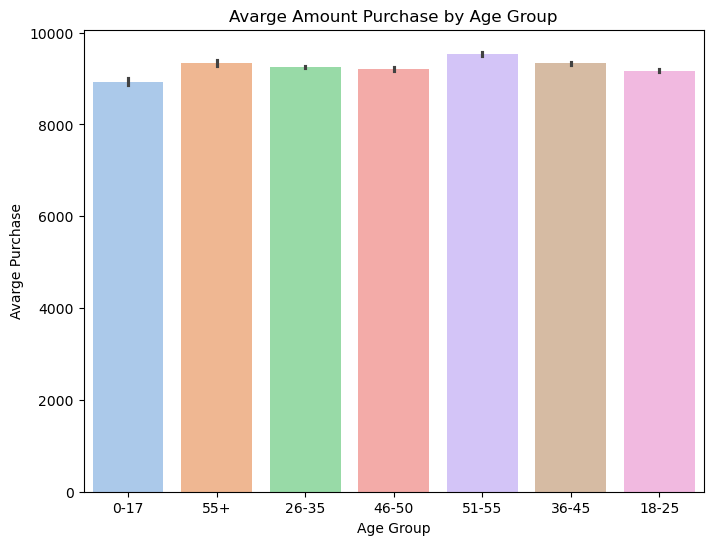

In [14]:
# Barplot for Avarge Purchase by Age group
plt.figure(figsize=(8, 6))
sns.barplot(x='Age', y='Purchase', data=black_df, palette='pastel')
plt.title('Avarge Amount Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avarge Purchase')
plt.show()

## Predictive Modeling

Validation r2 Score: 0.627248711328828


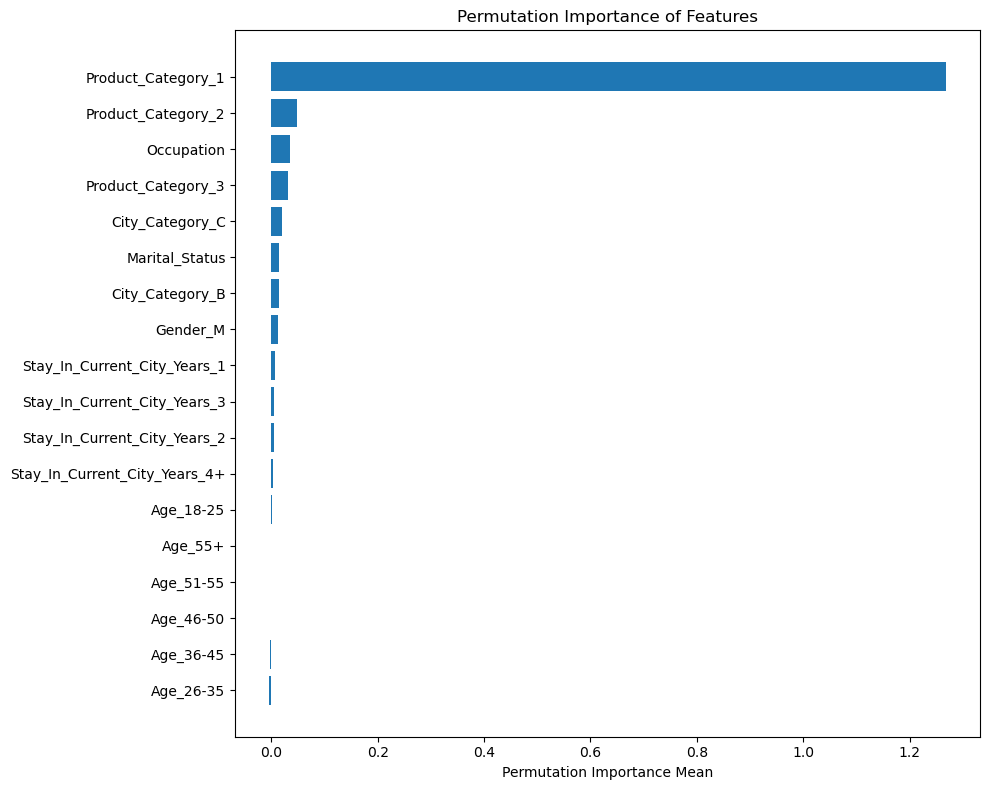

In [15]:
# Prepare the Data for Predictive Modeling
cols_to_drop = ['User_ID', 'Product_ID']
model_df = black_df.drop(columns=cols_to_drop)

#Separte Target From Predictors
y = model_df['Purchase']
X = model_df.drop('Purchase', axis=1)

#Get dummies From Columns
X = pd.get_dummies(X, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], drop_first=True)

#Train the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Data Fit And Tranform
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predict the Data
y_pred = model.predict(X_test)

#Calculation Prediction Accuracy using r2 Score
r2 = r2_score(y_test, y_pred)
print('Validation r2 Score:', r2)

#Permutation Importance For Asses to Features
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

#Create a Barplot
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel('Permutation Importance Mean')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()


In [16]:
import joblib

model_name= 'Blackfridaysales.pkl'
joblib.dump(model, model_name)

print(f"\nFile is Dumped into Model!")


File is Dumped into Model!


# Conclusion And Future Prediction

- The Black Friday sales dataset offers a compelling snapshot of consumer purchasing behavior across diverse demographics and product categories. Through detailed analysis and modeling, we've uncovered key trends that can drive data-driven decision-making in retail. Looking ahead, this dataset lays the groundwork for advanced applications such as personalized marketing, dynamic pricing, and real-time inventory optimization. With further refinement and integration of external data sources, future predictions could help retailers anticipate customer needs, boost engagement, and strategically enhance sales performance.

- Based on the trends and patterns uncovered, retailers can leverage this dataset to develop personalized marketing strategies, implement dynamic pricing models, and optimize inventory in real time. As more data accumulates over future Black Friday events, predictive models can become increasingly accurate—anticipating customer behavior, forecasting high-demand products, and maximizing revenue opportunities through strategic planning.
